# Lecture 4. Q-Learning exploit & exploration and discouted reward

Q-Learning을 완벽하게 하는 방법에 대해서 배운다.

Lecture 3. 에서는 Exploit VS Exploration을 하지 않는 다는 문제점이 있었다.  
따라서 이번에는 Exploit and Exploration을 접목해서 학습 시키는 방법에 대해서 해보자.

Exploration : E-greedy 정책  
Decaying E-greedy : 시간이 지날수록 Epsilon 값을 감소 시켜서 Exploration 확률을 줄이는 것  
Random Noise : 각각의 Argment에 Random한 값을 더해서 argmax가 다르게 나오도록 하는것.

Q^hat converges to Q.

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False
    }
)

In [2]:
env = gym.make('FrozenLake-v3')

In [17]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

dis = 0.99
num_episodes = 2000

rList = []

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    e = 1 / ((i / 100) +1)
    
    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        
        #action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        
        new_state, reward, done, _ = env.step(action)
        
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate: 0.0
Final Q-Table Values
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


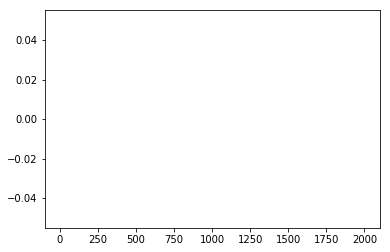

In [18]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()